In [4]:
import datetime

import os
import pickle
import sys

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Config

In [5]:
root_dir = "./../"
data_path = os.path.join(root_dir, 'data')
diabetes_dataset_path = os.path.join(data_path, 'diabetes.csv')
models_path = os.path.join(root_dir, 'models')

## Load the dataset

In [7]:
df_diabetes = pd.read_csv(diabetes_dataset_path)
print(f"Features: {list(df_diabetes.columns[:-1])} Predict: {df_diabetes.columns[-1]}")

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] Predict: Outcome


In [8]:
# count the number of positive and negative labels
counts = df_diabetes["Outcome"].value_counts()

# print the counts
print("Positive labels (Outcome=1):", counts[1])
print("Negative labels (Outcome=0):", counts[0])

Positive labels (Outcome=1): 268
Negative labels (Outcome=0): 500


## Data Insights

In [9]:
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df2 = df_diabetes.groupby(['Outcome']).agg(['mean'])
df2 = df2[['Glucose', 'BMI', 'Insulin', 'Age']]
print(df2)

            Glucose        BMI     Insulin        Age
               mean       mean        mean       mean
Outcome                                              
0        109.980000  30.304200   68.792000  31.190000
1        141.257463  35.142537  100.335821  37.067164


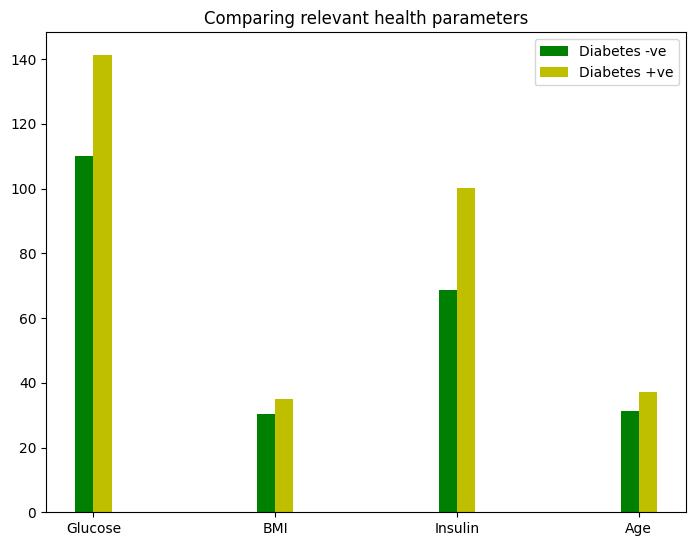

In [11]:
import matplotlib.pyplot as plt

data = [[30, 25, 50, 20],
[40, 23, 51, 17]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Comparing relevant health parameters')
ax.set_xticks(X, ['Glucose', 'BMI', 'Insulin', 'Age'])
ax.bar(X - 0.05, df2.iloc[0], color = 'g', width = 0.1)
ax.bar(X + 0.05, df2.iloc[1], color = 'y', width = 0.1)
ax.legend(labels=['Diabetes -ve', 'Diabetes +ve'])

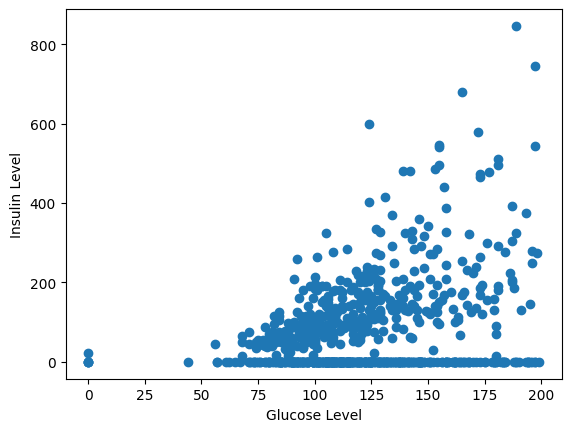

In [12]:
glucose_val = df_diabetes['Glucose']
insulin_val = df_diabetes['Insulin']

plt.scatter(glucose_val, insulin_val)

plt.xlabel("Glucose Level")
plt.ylabel("Insulin Level")
plt.show()

## Logistic Regression

In [23]:
# splitting the dataset into training and testing sets
X = df_diabetes.drop("Outcome", axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizing the dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# creating the Logistic Regression model
lr_model = LogisticRegression(penalty='l2', C=0.5)

# fit to the train data
lr_model.fit(X_train, y_train)

# making predictions on the test data
y_pred = lr_model.predict(X_test)

# evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.7857142857142857
Confusion matrix:
[[90  9]
 [24 31]]


## Decision Trees

In [24]:
# splitting the dataset into training and testing sets
X = df_diabetes.drop("Outcome", axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the Decision Tree model
dt_model = DecisionTreeClassifier(min_samples_split=5, max_depth=5)

# fitting the model on the training data and making predictions on the test data
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.7922077922077922
Confusion matrix:
[[87 12]
 [20 35]]


## Random Forest

In [31]:
# splitting the dataset into training and testing sets
X = df_diabetes.drop("Outcome", axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

# fitting the model on the training data and making predictions on the test data
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.7597402597402597
Confusion matrix:
[[82 17]
 [20 35]]


## SVM

In [39]:
# splitting the dataset into training and testing sets
X = df_diabetes.drop("Outcome", axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the SVM model
svm_model = SVC(C=2.0, kernel='rbf')

# fitting the model on the training data and making predictions on the test data
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.7727272727272727
Confusion matrix:
[[86 13]
 [22 33]]


## Gradient Boosting

In [55]:
# splitting the dataset into training and testing sets
X = df_diabetes.drop("Outcome", axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the Gradient Boosting model
gb_model = GradientBoostingClassifier(learning_rate=1.0, n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, random_state=42)

# fitting the model on the training data and making predictions on the test data
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

# evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.7532467532467533
Confusion matrix:
[[76 23]
 [15 40]]


## Neural Networks

In [71]:
# splitting the dataset into training and testing sets
X = df_diabetes.drop("Outcome", axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(16,8,4), activation='relu', solver='adam', max_iter=200, alpha=0.45)

# fitting the model on the training data and making predictions on the test data
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)

# evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.7077922077922078
Confusion matrix:
[[95  4]
 [41 14]]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Dump the models

In [19]:
# create folder with name_datestamp
name = "anirudh"
folder_name = datetime.datetime.now().date().strftime("%m%d%Y")
folder_path = os.path.join(models_path, name + "_" + folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
                      

with open(os.path.join(folder_path, 'lr_model.pkl'), 'wb') as file:
    pickle.dump(lr_model, file)

# Dump decision tree model to file
with open(os.path.join(folder_path, 'dt_model.pkl'), 'wb') as file:
    pickle.dump(dt_model, file)

# Dump random forest model to file
with open(os.path.join(folder_path, 'rf_model.pkl'), 'wb') as file:
    pickle.dump(rf_model, file)

# Dump SVM model to file
with open(os.path.join(folder_path, 'svm_model.pkl'), 'wb') as file:
    pickle.dump(svm_model, file)

# Dump gradient boosting model to file
with open(os.path.join(folder_path, 'gb_model.pkl'), 'wb') as file:
    pickle.dump(gb_model, file)

# Dump neural network model to file
with open(os.path.join(folder_path, 'nn_model.pkl'), 'wb') as file:
    pickle.dump(nn_model, file)